<a href="https://colab.research.google.com/github/priyanka226/board-Game-Review-prediction/blob/master/main-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
    from google.colab import files

    uploaded = files.upload()

    for fn in uploaded.keys():
       print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving games.csv to games.csv
User uploaded file "games.csv" with length 7001767 bytes


In [0]:
import sys
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model,preprocessing
%matplotlib inline

In [0]:
print("python version:", sys.version)
print("pandas version:", pandas._version_)
print("matplotlib version:", matplotlib._version_)
print ("seaborn version:",seaborn._version_)
print ("sklearn:", sklearn._version_)

python version: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


AttributeError: ignored

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
#load data
games= pandas.read_csv('games.csv')

In [0]:
#print the names of the columns in the game
print(games.columns)
print(games.shape)


Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


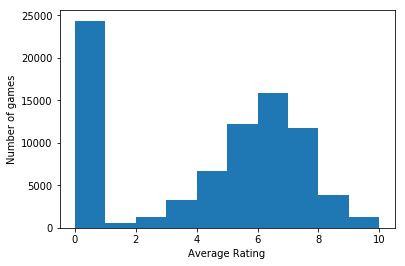

In [0]:
#make a histogram of all the ratings in the average rating column
plt.hist(games['average_rating'])
plt.xlabel('Average Rating')
plt.ylabel('Number of games')
plt.show()

In [0]:
#print the first row of all the games with zero scores
print(games[games["average_rating"]==0].iloc[0])


#print the first row of games with scores greater than 0
print(games[games["average_rating"]> 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

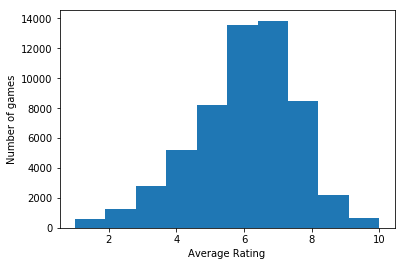

In [0]:
#remove any rows without user reviews
games=games[games["users_rated"]> 0]

#remove any rows with missing rows
games=games.dropna(axis=0)

#make a histogram of all the ratings in the average rating 
plt.hist(games['average_rating'])
plt.xlabel('Average Rating')
plt.ylabel('Number of games')
plt.show()

In [0]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


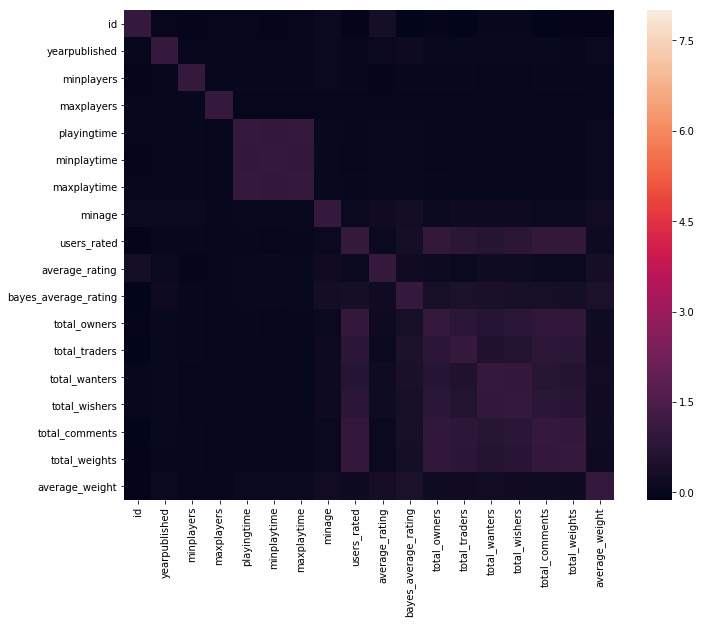

In [0]:
#correlation matrix
corrmat=games.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax =8, square= True)
plt.show()

In [0]:
#get all the columns from the data grame

columns= games.columns.tolist()

#filter the columns to remove data we do not want
columns=[c for c in columns if c not in["bayes_average_rating", "average_rating", "type","name", "id"]]

#store the variable we'll be predicting on
target = "average_rating"



In [0]:
#generating train and test datasets
from sklearn.model_selection import train_test_split

#generate training set

train = games.sample(frac=0.8, random_state= 1)

#select anything not in the training set and put in the test
test= games.loc[~games.index.isin(train.index)]
#print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [0]:
# import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#initialize the model class
LR = LinearRegression()

#fit the model to the training data
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Generate prediction for the test set
predictions = LR.predict(test[columns])

#compute error between test prediction and actual value
mean_squared_error(predictions, test[target])

2.078819032629323

In [0]:
#import the random forest model
from sklearn.ensemble import RandomForestRegressor
#initialize the model
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

#fit to data
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [0]:
#make predictions 
predictions= RFR.predict(test[columns])

#compute the error between test prediction and actual value
mean_squared_error(predictions, test[target])

1.4458560046071653

In [0]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [0]:
#make this prediction with both models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

#print the predictions
print(rating_LR)
print(rating_RFR)

#print actual value
test[target].iloc[0]

[8.12061283]
[7.91373581]


8.07933